In [375]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode
import re
from scipy import stats

# datos

In [376]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [377]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfmerged')
dfp.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,Zonas Verdes,Supermercados / C.Comerciales,Instalación de gas,Parqueadero Visitantes,Colegios / Universidades,Parques cercanos,Zona Residencial,Closet,municipio,tipo_propiedad
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rionegro,casa


# Limpieza de los Nan 

In [378]:
def graf_num_nan(df):
        dfNan = df.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda df: (
                            df.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(df), # numero total de registros en el df original
                                    pct_missing = lambda df1 : df1.numero_Nan / df1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
        plt.figure(figsize=(20,7))
        dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
        plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
        plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
        plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
        # plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
        plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
        plt.xlabel("numero de Nan")
        plt.ylabel("Variable en orden ascendente en razon al numero de Nan")


        return dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,1314,2715,48.397790


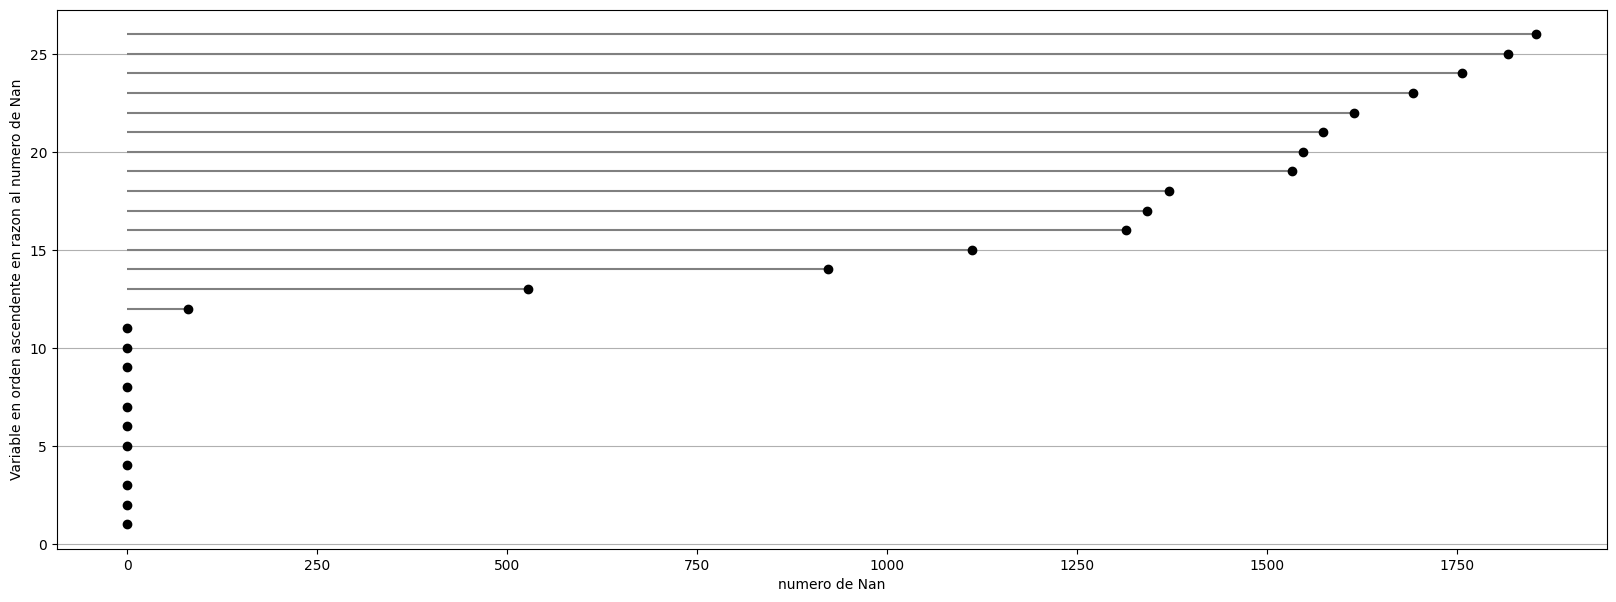

In [379]:
graf_num_nan(dfp)


Para todas las columnas excepto 
estrato y antiguedad se reemplazaran por 0

In [380]:
exclude_cols = ['antiguedad', 'estrato']

# reemplazar los valores NaN en las columnas no seleccionadas
cols_to_replace = dfp.columns[~dfp.columns.isin(exclude_cols)]
dfp[cols_to_replace] = dfp[cols_to_replace].fillna(0)

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,0,2715,0.000000


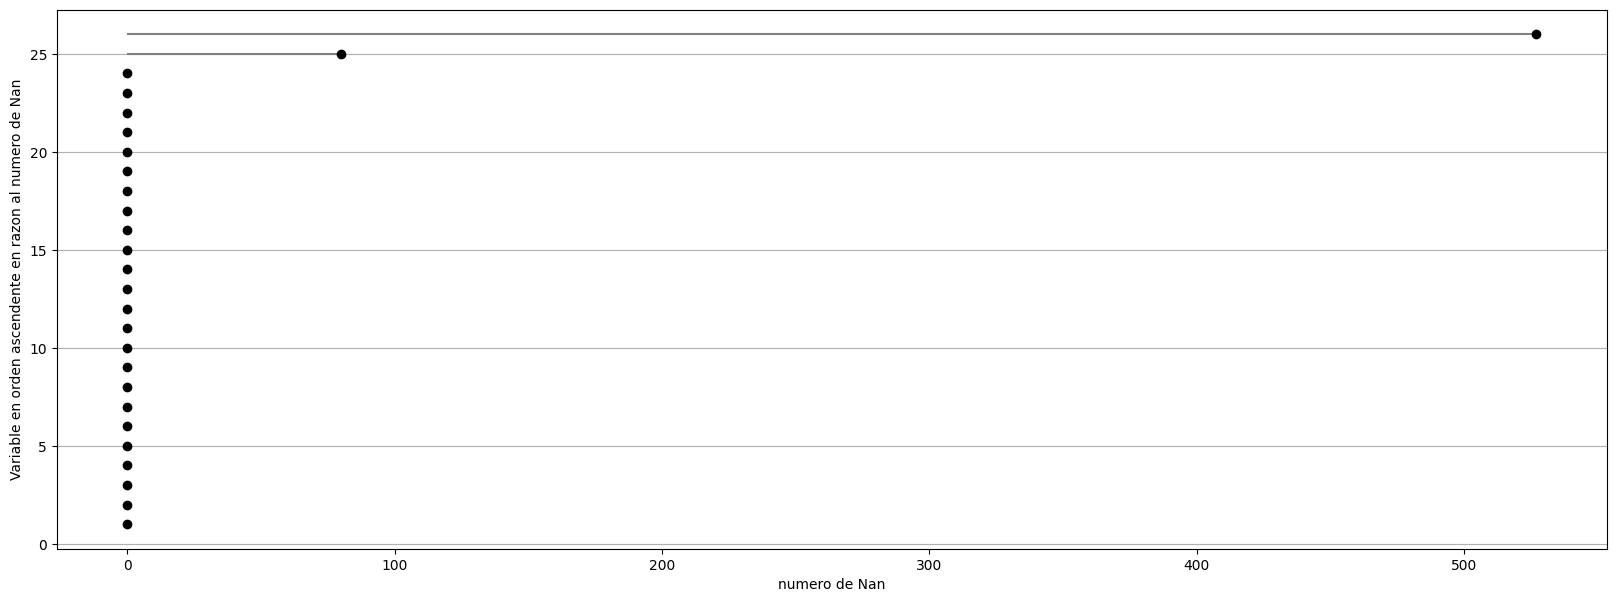

In [381]:
graf_num_nan(dfp)

# renombre de columnas

In [382]:
dfp.columns=dfp.columns.map(str.lower)

In [383]:
dfp.columns = [unidecode(i) for i in dfp.columns]

In [384]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trans. publico cercano', 'estrato',
       'antiguedad', 'cocina integral', 'bano auxiliar', 'zona de lavanderia',
       'zonas verdes', 'supermercados / c.comerciales', 'instalacion de gas',
       'parqueadero visitantes', 'colegios / universidades',
       'parques cercanos', 'zona residencial', 'closet', 'municipio',
       'tipo_propiedad'],
      dtype='object')

In [385]:
dfp.head()

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,zonas verdes,supermercados / c.comerciales,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo_propiedad
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,casa
1,Usada,https://www.fincaraiz.com.co/finca-en-venta/el...,Finca en Venta El Retiro Arcadia,$ 2.900.000.000,"1,00 Ha",4,5,Sin especificar,propiedad con casa principal de 4 habitaciones...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,el retiro,finca
2,Nueva,https://www.fincaraiz.com.co/vivari-de-san-nic...,VIVARI DE SAN NICOLAS San Nicolás - Rionegro,$ 496.122.600,"91,97 m2",3,3,1,"6234794 Vivari San Nicolás, es un conjunto res...",1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,apartamento
3,Usada,https://www.fincaraiz.com.co/casa-en-venta/san...,Casa en Venta San Antonio de Pereira villas de...,$ 570.000.000,"150,00 m²",3,3,1,Casa en venta en Villas de Gualanday por 580 m...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,san antonio de pereira,casa
4,Usada,https://www.fincaraiz.com.co/casa-en-venta/mar...,Casa en Venta Marinilla Monteverde,$ 290.000.000,"106,00 m²",3,3,1,Gran oportunidad Vendo casa unifamiliar no pag...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,casa


In [386]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2715 non-null   object 
 1   url                            2715 non-null   object 
 2   titulo                         2715 non-null   object 
 3   precio                         2715 non-null   object 
 4   area                           2715 non-null   object 
 5   habitaciones                   2715 non-null   object 
 6   banos                          2715 non-null   object 
 7   garajes                        2715 non-null   object 
 8   descripcion                    2715 non-null   object 
 9   balcon                         2715 non-null   float64
 10  trans. publico cercano         2715 non-null   float64
 11  estrato                        2635 non-null   object 
 12  antiguedad                     2188 non-null   o

# se procede a relizar reorganizacion de varibales


Se cambiaran los tipos de variables y detalles

para la variables tipo que comprende entre usada y nueva se pasara a numero en dode usada es 0 y nueva es 1

In [387]:
dfp['tipo'] = dfp['tipo'].apply(lambda x: 0 if x == 'Usada' else 1)
dfp['tipo'].unique()

array([0, 1], dtype=int64)

a la variable precio se le quitara el simbolo y se pasara a numero

In [388]:
dfp['precio']

0       $ 1.380.000.000
1       $ 2.900.000.000
2         $ 496.122.600
3         $ 570.000.000
4         $ 290.000.000
             ...       
2710      $ 480.000.000
2711      $ 350.000.000
2712    $ 3.000.000.000
2713      $ 260.000.000
2714      $ 400.000.000
Name: precio, Length: 2715, dtype: object

In [389]:
dfp['precio'] = dfp['precio'].apply(lambda x: int(x.replace('$', '').replace(' ', '').replace('.', '')))
dfp['precio']

0       1380000000
1       2900000000
2        496122600
3        570000000
4        290000000
           ...    
2710     480000000
2711     350000000
2712    3000000000
2713     260000000
2714     400000000
Name: precio, Length: 2715, dtype: int64

para la columna area se eliminaran las que estan en hectareas las cuales son 143 y se pasaran los valores de una cadena a flotante

In [390]:
dfp['medida'] = dfp['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0])
dfp['medida'].value_counts()

m     2587
Ha     128
Name: medida, dtype: int64

In [391]:
dfp = dfp[~dfp['area'].str.contains('Ha|hA|HA')]
dfp.shape

(2587, 27)

In [392]:
dfp['medida'] = dfp['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0])
dfp['medida'].value_counts()

m    2587
Name: medida, dtype: int64

In [393]:
dfp.drop('medida',axis=1,inplace=True)

In [394]:
dfp['area'] = dfp['area'].apply(lambda x: re.sub('[^\d\.]', '', x)).astype(float)
dfp['area']

0       32000.0
2       91972.0
3       15000.0
4       10600.0
5       73372.0
         ...   
2710    26200.0
2711     6000.0
2712    58000.0
2713    10400.0
2714     6500.0
Name: area, Length: 2587, dtype: float64

In [395]:
dfp.habitaciones.unique()

array(['5', '3', '4', '2', '---', '1', '7', '9', '6', 'Sin especificar',
       '12', '8', '14', '20', '21', '10', '15'], dtype=object)

In [396]:
dfp['habitaciones'] = dfp['habitaciones'].apply(lambda x: re.sub('[^\d]', '', str(x)))
dfp['habitaciones'] = pd.to_numeric(dfp['habitaciones'], errors='coerce') # errors='coerce'  para que cualquier valor que no se pueda convertir se reemplace con NaN.
dfp['habitaciones'] = dfp['habitaciones'].fillna(0)
dfp['habitaciones']

0       5.0
2       3.0
3       3.0
4       3.0
5       3.0
       ... 
2710    3.0
2711    2.0
2712    4.0
2713    2.0
2714    3.0
Name: habitaciones, Length: 2587, dtype: float64

In [397]:
dfp['banos'] = dfp['banos'].apply(lambda x: re.sub('[^\d]', '', str(x)))
dfp['banos'] = pd.to_numeric(dfp['banos'], errors='coerce') # errors='coerce'  para que cualquier valor que no se pueda convertir se reemplace con NaN.
dfp['banos'] = dfp['banos'].fillna(0)
dfp['banos']

0       6.0
2       3.0
3       3.0
4       3.0
5       3.0
       ... 
2710    2.0
2711    2.0
2712    6.0
2713    1.0
2714    2.0
Name: banos, Length: 2587, dtype: float64

en el caso de los garajes hay algunos que tienne ams de 10, para estos les colocaremos como 11 ya que hay zoans con 10

In [398]:
dfp['garajes'] = dfp['garajes'].apply(lambda x: int(x.replace('Más de 10', '11').replace('Sin especificar', '0')))
dfp['garajes'].unique()

array([ 2,  1,  0,  4,  3,  5,  8,  7,  6,  9, 11, 10], dtype=int64)

para el estrato campestre(48) asumiremos que es estrato 3 y para los nan (117) tambien

In [399]:
(dfp['estrato']=='Campestre').sum() , (dfp['estrato'].isna().sum())

(28, 73)

In [400]:
dfp['estrato'] = dfp['estrato'].replace('Campestre', '3').astype(float)
dfp['estrato'].fillna(3,inplace=True)

In [401]:
dfp['estrato']

0       5.0
2       3.0
3       5.0
4       4.0
5       3.0
       ... 
2710    3.0
2711    4.0
2712    6.0
2713    3.0
2714    4.0
Name: estrato, Length: 2587, dtype: float64

para el caso de antiguedad asumiremos que las casas que estan en el mismo estrato tienden a tener los mismo años de antiguedad, por lo tanto se ordenaran por estrato y se aplicara el ffill de fillna , que cambia los nan de acuerdo a los anteriores
Adicionalmente a eso se cambiaran los siguientes valores que facilitaran su estudio y tratamiento.

* "Menos de 1 año": 0
* "1 a 8 años": 1
* "9 a 15 años": 2
* "16 a 30 años": 3
* "Más de 30 años": 4

In [402]:
dfp['original_index'] = dfp.index # esta columna se crea para volver a poner los datos como estaban
dfp = dfp.sort_values('antiguedad')
dfp['antiguedad'] = dfp['antiguedad'].fillna(method='ffill')
dfp = dfp.sort_values('original_index') # Volver a ordenar por el índice original
dfp = dfp.drop('original_index', axis=1)

In [403]:
cambioano = {
    
    "Menos de 1 año": 0,
    "1 a 8 años": 1,
    "9 a 15 años": 2,
    "16 a 30 años": 3,
    "Más de 30 años": 4
}
dfp['antiguedad'] = dfp['antiguedad'].map(cambioano)
dfp.fillna(0,inplace=True) # esto es porque ya habia un valor de 0, no afecta en nada 

In [404]:
dfp['antiguedad'].unique()

array([1., 0., 4., 2., 3.])

como resultado nos queda el siguiente dataframe

In [405]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2714
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2587 non-null   int64  
 1   url                            2587 non-null   object 
 2   titulo                         2587 non-null   object 
 3   precio                         2587 non-null   int64  
 4   area                           2587 non-null   float64
 5   habitaciones                   2587 non-null   float64
 6   banos                          2587 non-null   float64
 7   garajes                        2587 non-null   int64  
 8   descripcion                    2587 non-null   object 
 9   balcon                         2587 non-null   float64
 10  trans. publico cercano         2587 non-null   float64
 11  estrato                        2587 non-null   float64
 12  antiguedad                     2587 non-null   f

In [406]:
dfp.isna().sum().sum() # numero de nan en el dataframe

0

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2587,0.0
1,url,0,2587,0.0
2,titulo,0,2587,0.0
3,precio,0,2587,0.0
4,area,0,2587,0.0
5,habitaciones,0,2587,0.0
6,banos,0,2587,0.0
7,garajes,0,2587,0.0
8,descripcion,0,2587,0.0
9,balcon,0,2587,0.0


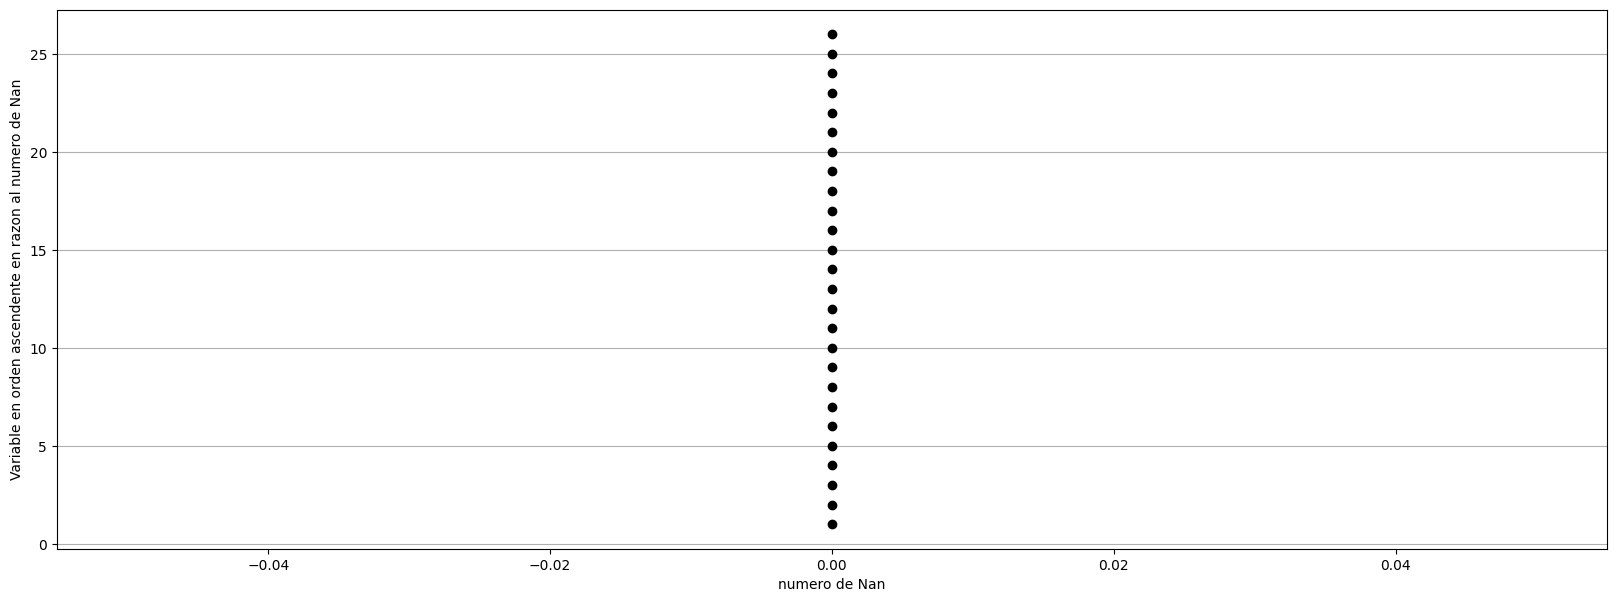

In [407]:
graf_num_nan(dfp)

## renombramiento de columnas

In [408]:
cols = {'trans. publico cercano': 'trasn. publico',
        'cocina integral' : 'cocina', 'bano auxiliar':'bano aux',
        'zona de lavanderia' : 'zona lavanderia' , 'supermercados / c.comerciales': 'supermercado o cc',
        'nombre municipio': 'municipio', 'nombre departamento':'departamento',
        'tipo: municipio / isla / area no municipalizada':'tipo vivienda'}
dfp = dfp.rename(columns=cols)

In [409]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trasn. publico', 'estrato',
       'antiguedad', 'cocina', 'bano aux', 'zona lavanderia', 'zonas verdes',
       'supermercado o cc', 'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'tipo_propiedad'],
      dtype='object')

# deteccion de valores atipicos

In [410]:
print(f'valor inicial de fials antes de limpieza de valores atipicos {dfp.shape[0]}')

valor inicial de fials antes de limpieza de valores atipicos 2587


## filtrado de datos

incialmente se eliminaran los precios que esten superiores a  2.500'000.000 (dos mil quinientos millones)

In [411]:
# dfp = dfp[dfp['precio']<2500000000]
dfp.shape

(2587, 26)

## busqueda valores atipicos

se buscaran valores atipicos con el fin de tratarlos para que no afecte modelos sensibles a estos valores


In [412]:
# se divide entre 1'000.000 para facilitar lectura
(dfp['precio']/1000000).describe()

count      2587.000000
mean       1007.141763
std        4374.368083
min          17.500000
25%         320.000000
50%         500.000000
75%        1150.000000
max      215000.000000
Name: precio, dtype: float64

z-score: El z-score es una medida estadística que indica cuántas desviaciones estándar se encuentra un valor de la media. Los valores con un z-score superior a 3 o inferior a -3 se consideran atípicos. Es muy util si los datos siguen una distribucion normal, como este no es el caso se usara otro tipo de buscador de atipicos

In [413]:
from scipy.stats import normaltest

stat, p = normaltest(dfp['precio'])

# Imprimir los resultados del test
print("Estadístico de prueba =", stat)
print("Valor p =", p)

# Interpretación del resultado del test
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula, los datos NO siguen una distribución normal.")
else:
    print("No podemos rechazar la hipótesis nula, los datos siguen una distribución normal.")


Estadístico de prueba = 7953.281818903822
Valor p = 0.0
Rechazamos la hipótesis nula, los datos NO siguen una distribución normal.


### Pasos para la deteccion de valores atipicos:

1. Identificar las variables con posibles valores atipicos
2. Identificar el rango intercuartil
3. Identificar los limites superior e inferior
4. Identificar los valors atipicos mediante metodos como:
    1. Analisis de visualizacion
    2. Metodos estadisticos
    3. Metodos de aprendizaje automatico
5. decision de valores atipicos

1. Identificar las variables ocn posibles valores atipicos

En nuestro caso solo tendremos dos variables las cuales seran precio y el area

In [414]:
coloutliers = ['precio','area']

2. Identificar el rango intercuartil

In [415]:
Q1a = np.percentile(dfp['area'],25)
Q3a = np.percentile(dfp['area'],75)
IQRa = Q3a-Q1a
print(f'El rango intercuartil del area es: {IQRa}')

El rango intercuartil del area es: 14000.0


In [416]:
Q1p = np.percentile(dfp['precio'],25)
Q3p = np.percentile(dfp['precio'],75)
IQRp = Q3p-Q1p
print(f'El rango intercuartil del precio es: {IQRp}')

El rango intercuartil del precio es: 830000000.0


3. Identifiar los limites superiores e inferiores

In [417]:
limsupP = Q3p + 1.5 * IQRp
liminfP = Q1p - 1.5* IQRp
print(f'El limite inferior del precio es : {-liminfP} y el superior es : {limsupP}')

El limite inferior del precio es : 925000000.0 y el superior es : 2395000000.0


In [418]:
limsupA = Q3a + 1.5 * IQRa
liminfA = Q1a - 1.5* IQRa
print(f'El limite inferior del area es : {-liminfA} y el superior es : {limsupA}')

El limite inferior del area es : 15500.0 y el superior es : 40500.0


4. Identificar valores atipicos 

4.1. Analisis visual

In [419]:
def grafout(df):
    fig, ax = plt.subplots(ncols=2,figsize=(10,3))
    sns.kdeplot(df, shade=True, ax=ax[0]);
    sns.boxplot(df, orient='h', ax=ax[1]);

In [420]:
data = ['precio','area']

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


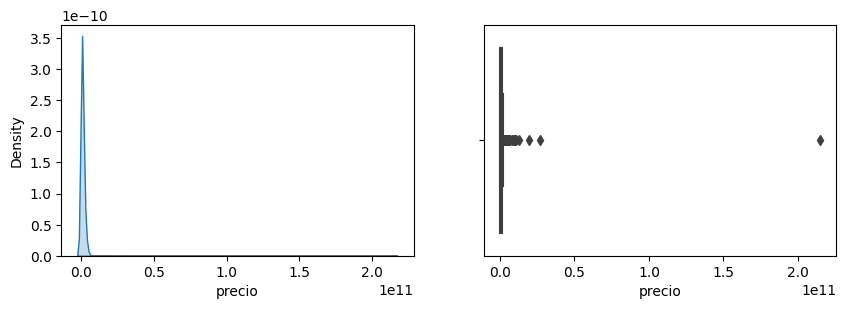

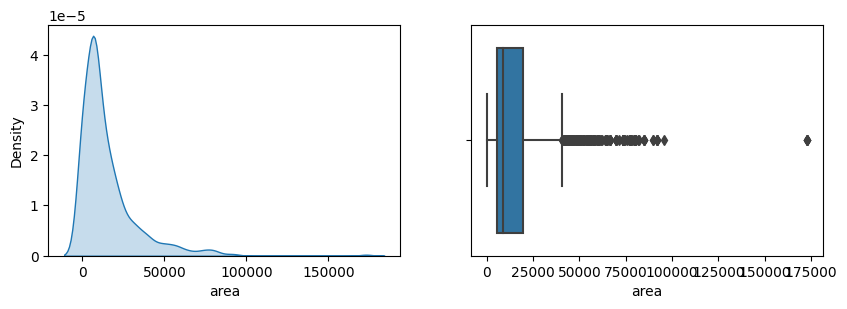

In [421]:
for i in data:
    grafout(dfp[i])

a cimple vista observamos claramente dos valores atipicos que podemos eliminar de maenra visual

In [422]:
(dfp.precio/1000000).describe()

count      2587.000000
mean       1007.141763
std        4374.368083
min          17.500000
25%         320.000000
50%         500.000000
75%        1150.000000
max      215000.000000
Name: precio, dtype: float64

In [423]:
dfp= dfp[dfp['area'] <= 100000]
dfp=dfp[dfp["precio"]<=2500000000]

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


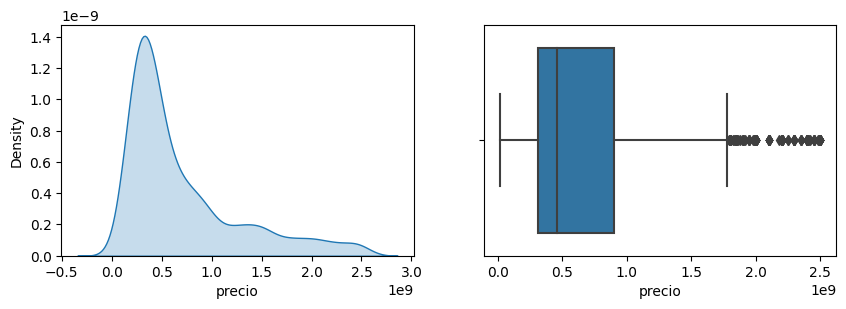

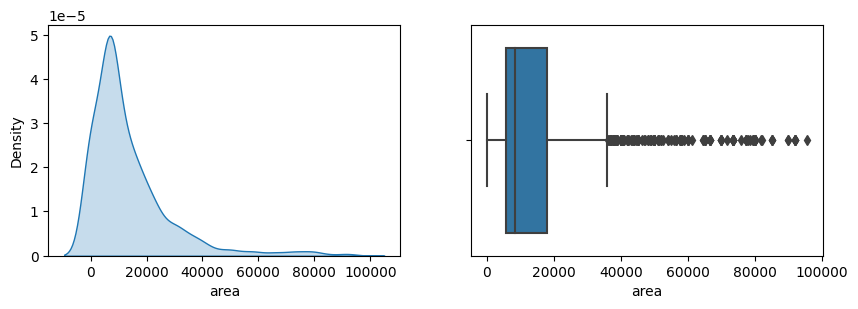

In [424]:
for i in data:
    grafout(dfp[i])

4.3 •	Métodos de aprendizaje automático: Utiliza algoritmos de detección de anomalías como el algoritmo de One-Class SVM (encontrar una función de decisión que defina una región que contenga la mayoría de los datos y separe la región de los datos anómalos.) o el algoritmo de DBSCAN (los puntos cercanos entre sí forman grupos, mientras que los puntos aislados son ruidosos o atípicos) para detectar valores atípicos



In [425]:
from sklearn.svm import OneClassSVM

# Crear una instancia de OneClassSVM con los parámetros deseados
clf = OneClassSVM(kernel='rbf', nu=0.05)

# Entrenar el modelo con los datos de las columnas seleccionadas
clf.fit(dfp[data])

# Predecir los valores de las columnas seleccionadas como inliers o outliers
outlier_prediction = clf.predict(dfp[data])

# Agregar la columna de predicción al DataFrame original
dfp['outlier_prediction'] = outlier_prediction


In [426]:
dfp['outlier_prediction'].value_counts()

 1    2274
-1     124
Name: outlier_prediction, dtype: int64

5. el predictor para la columna precio y area encontro 124 valores atipicos, por lo que procederemos a eliminarlos

In [433]:
outlier_indices = dfp[dfp['outlier_prediction'] == -1].index

# Eliminar las filas con valores atípicos
dfp.drop(outlier_indices, inplace=True)
# eliminar columna outlier_prediction
dfp.drop('outlier_prediction', axis=1, inplace=True)


A continuacion observaremos la grafica d elos datos para verificar

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


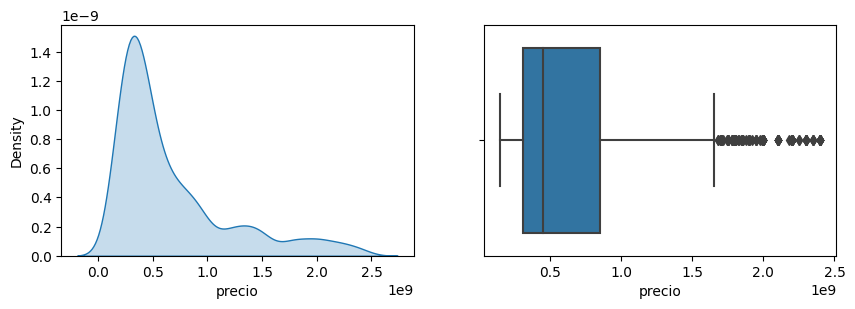

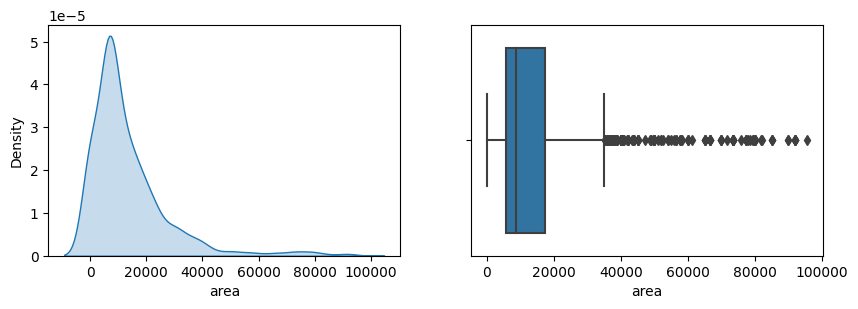

In [428]:
for i in data:
    grafout(dfp[i])

In [434]:
dfp.shape

(2274, 26)

Ahora tenemos el df listo para analisis

## creacion dataframe de analisis

In [435]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trasn. publico', 'estrato',
       'antiguedad', 'cocina', 'bano aux', 'zona lavanderia', 'zonas verdes',
       'supermercado o cc', 'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'tipo_propiedad'],
      dtype='object')

In [437]:
nocols = ['tipo','url','titulo','descripcion']
dfdef = [col for col in dfp.columns if col not in nocols]
df = dfp[dfdef]

In [438]:
df.columns

Index(['precio', 'area', 'habitaciones', 'banos', 'garajes', 'balcon',
       'trasn. publico', 'estrato', 'antiguedad', 'cocina', 'bano aux',
       'zona lavanderia', 'zonas verdes', 'supermercado o cc',
       'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'tipo_propiedad'],
      dtype='object')

## exportacion de datos

Ejecutar en caso de que no se tengan

In [ ]:
df.to_csv('dfanalisis', index=False)

In [205]:
dfp.to_csv('dfclean', index=False)